<a href="https://colab.research.google.com/github/katha08/Bsc-Thesis-paper/blob/master/prediction_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy
import pandas as pd
df=pd.read_csv('Crops02v2.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Area,Rainfall,Humidity,Temperature,prevYearsRainfall,prevYearsTemperature,prevYearsHumidity,Crop
0,Andhra Pradesh,ANANTAPUR,2008,Autum,6041,0.0,0.41,33,NaN,NaN,NaN,Maize
1,Andhra Pradesh,ANANTAPUR,2008,Winter,3658,0.2,0.94,24,NaN,NaN,NaN,Maize
2,Andhra Pradesh,ANANTAPUR,2009,Autum,8852,1.1,0.60,30,0.0,33.0,0.41,Maize
3,Andhra Pradesh,ANANTAPUR,2009,Winter,4615,18.0,0.72,27,0.2,24.0,0.94,Maize
4,Andhra Pradesh,ANANTAPUR,2010,Autum,10726,22.0,0.51,32,1.1,30.0,0.60,Maize


**data preprocessing** (removing noisy data)

In [0]:
df.drop(['State_Name','District_Name','Crop_Year','Season','prevYearsRainfall','prevYearsTemperature','prevYearsHumidity'],axis='columns',inplace=True)
df.head()

,Area,Rainfall,Humidity,Temperature,Crop
0,6041,0.0,0.41,33,Maize
1,3658,0.2,0.94,24,Maize
2,8852,1.1,0.60,30,Maize
3,4615,18.0,0.72,27,Maize
4,10726,22.0,0.51,32,Maize


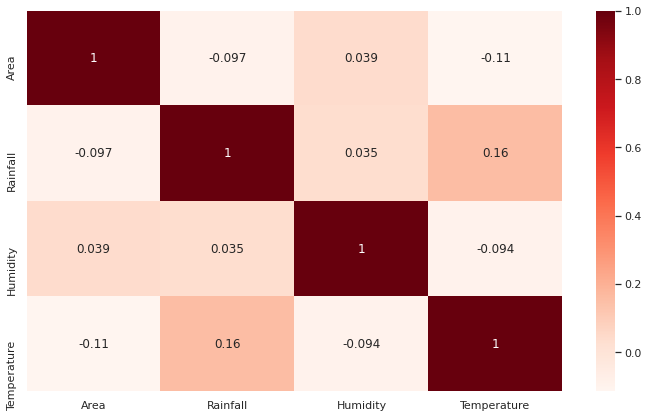

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns;
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')

finding nan value

In [0]:
df.columns[df.isna().any()]

Index([], dtype='object')

Spliting Target and Input variables 

In [0]:
target=df.Crop
inputs=df.drop('Crop',axis='columns')

In [0]:
target.head()

0    Maize
1    Maize
2    Maize
3    Maize
4    Maize
Name: Crop, dtype: object

In [0]:
inputs.head()

,Area,Rainfall,Humidity,Temperature
0,6041,0.0,0.41,33
1,3658,0.2,0.94,24
2,8852,1.1,0.60,30
3,4615,18.0,0.72,27
4,10726,22.0,0.51,32


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns;
plt.figure(figsize=(12,7))
sns.heatmap(inputs.corr(),annot=True,cmap='Reds')

**prediction algorithm**(naive baise)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=1)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2397
600
2397
600


In [0]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [0]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred=model.predict(X_test)
pred

array(['Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Arhar/Tur',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Arhar/Tur',
       'Moong(Green Gram)', 'Maize', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Rice', 'Maize', 'Arhar/Tur', 'Moong(Green Gram)', 'Maize',
       'Moong(Green Gram)', 'Maize', 'Moong(Green Gram)', 'Maize',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Maize', 'Rice', 'Maize', 'Moong(Green Gram)', 'Maize',
       'Moong(Green Gram)', 'Rice', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Maize', 'Maize', 'Rice',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Arhar/Tur',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Moong(Green Gram)', 'Moong(Green Gram)',
       'Moong(Green Gram)', 'Maize', 'Moong(Green Gram)', 'Rice', 'Maize',
  

In [0]:
model.score(X_test,y_test)

0.39666666666666667

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

                   precision    recall  f1-score   support

        Arhar/Tur       0.25      0.20      0.22        93
            Maize       0.35      0.21      0.26       169
Moong(Green Gram)       0.33      0.82      0.47       141
             Rice       0.87      0.35      0.50       197

         accuracy                           0.40       600
        macro avg       0.45      0.39      0.36       600
     weighted avg       0.50      0.40      0.38       600



In [0]:
from sklearn.metrics import accuracy_score
print('accuracy score is:', accuracy_score(y_test,pred))

accuracy score is: 0.39666666666666667


confussion matrix and heatmap

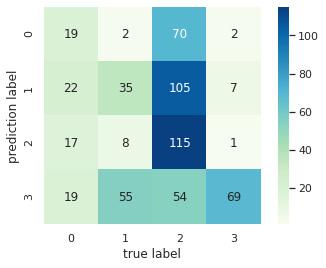

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test,pred)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
plt.xlabel('true label')
plt.ylabel('prediction label');

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs=model.predict_proba(X_test)
probs=probs[:,0]
#print (probs)
#auc=roc_auc_score(y_test,pred)
#print(auc)
fpr,tpr,thresh=roc_curve(y_test,pred)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker=".",color="red")


**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=60)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.495

In [0]:
y_predict=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                   precision    recall  f1-score   support

        Arhar/Tur       0.34      0.31      0.32        93
            Maize       0.41      0.47      0.44       169
Moong(Green Gram)       0.46      0.45      0.45       141
             Rice       0.68      0.63      0.66       197

         accuracy                           0.49       600
        macro avg       0.47      0.47      0.47       600
     weighted avg       0.50      0.49      0.50       600



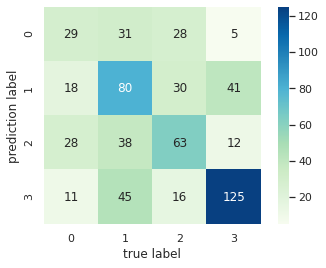

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
plt.xlabel('true label')
plt.ylabel('prediction label');

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs=model.predict_proba(X_test)
probs=probs[:,0]
#print (probs)
#auc=roc_auc_score(y_test,pred)
#print(auc)
fpr,tpr,thresh=roc_curve(y_test,y_predict)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker=".",color="red")

**KNN**

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=18)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 32  31  27   3]
 [ 45  67  27  30]
 [ 31  62  39   9]
 [ 19  51  23 104]]
                   precision    recall  f1-score   support

        Arhar/Tur       0.25      0.34      0.29        93
            Maize       0.32      0.40      0.35       169
Moong(Green Gram)       0.34      0.28      0.30       141
             Rice       0.71      0.53      0.61       197

         accuracy                           0.40       600
        macro avg       0.40      0.39      0.39       600
     weighted avg       0.44      0.40      0.41       600



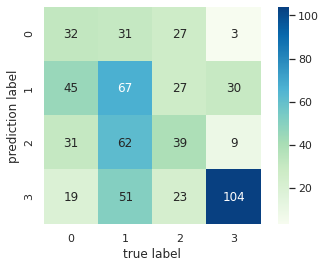

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
plt.xlabel('true label')
plt.ylabel('prediction label');

**SVM**

In [0]:
from sklearn import svm
classifier = svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)

y_predict=classifier.predict(X_test)


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                   precision    recall  f1-score   support

        Arhar/Tur       0.00      0.00      0.00        93
            Maize       0.32      0.92      0.47       169
Moong(Green Gram)       0.00      0.00      0.00       141
             Rice       0.82      0.47      0.60       197

         accuracy                           0.41       600
        macro avg       0.29      0.35      0.27       600
     weighted avg       0.36      0.41      0.33       600



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


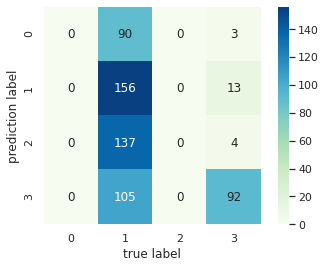

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
plt.xlabel('true label')
plt.ylabel('prediction label');

**Logistic Regression**

In [0]:
import sklearn.linear_model as sk
lr=sk.LogisticRegressionCV()
#from sklearn.linear_model import LogisticRegression
#lr=LogisticsRegression()
lr.fit(X_train,y_train)

y_predict=lr.predict(X_test)
lr.score(X_test,y_test)

0.475

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                   precision    recall  f1-score   support

        Arhar/Tur       0.37      0.28      0.32        93
            Maize       0.38      0.63      0.47       169
Moong(Green Gram)       0.43      0.35      0.39       141
             Rice       0.78      0.52      0.62       197

         accuracy                           0.48       600
        macro avg       0.49      0.45      0.45       600
     weighted avg       0.52      0.47      0.48       600



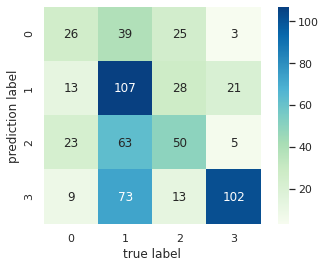

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test,y_predict)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)
plt.xlabel('true label')
plt.ylabel('prediction label');